![Logo Markdown](FIles/im1.png)

<h1>LIST OF MEMBERS </h1>

<h2>MICHEL </h2>
<h2>JOYCE</h2>
<h2>FIDELE</h2>
<h2>BATBAINA</h2>

![Logo Markdown](FIles/im2.png)

![Logo Markdown](FIles/im3.png)

![Logo Markdown](FIles/im44.png)

<h2>LOAD DATA AND PREPROCESSING</h2>

In this part we are going to load our data and preform a preprocessing of the data set. We take a images that contain only faces and we resize them whatever the dimension of this images and we sit them to be ready for training.

![Logo Markdown](FIles/im6.png)

In [1]:
import cv2
import os
import pickle
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

headshots_folder_name = 'Headshots'

# dimension of images
image_width = 224
image_height = 224

# for detecting faces
facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# set the directory containing the images
images_dir = os.path.join(".", headshots_folder_name)

current_id = 0
label_ids = {}

# iterates through all the files in each subdirectories
for root, _, files in os.walk(images_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
            # path of the image
            path = os.path.join(root, file)

            # get the label name (name of the person)
            label = os.path.basename(root).replace(" ", ".").lower()

            # add the label (key) and its number (value)
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1

            # load the image
            imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
            image_array = np.array(imgtest, "uint8")

            # get the faces detected in the image
            faces = facecascade.detectMultiScale(imgtest,scaleFactor=1.1, minNeighbors=5)

            # if not exactly 1 face is detected, skip this photo
            if len(faces) != 1:
                print(f'---Photo skipped---\n')
                continue

            # save the detected face(s) and associate
            # them with the label
            for (x_, y_, w, h) in faces:

                # draw the face detected
                face_detect = cv2.rectangle(imgtest,
                        (x_, y_),
                        (x_+w, y_+h),
                        (255, 0, 255), 2)
                plt.imshow(face_detect)
                plt.show()

                # resize the detected face to 224x224
                size = (image_width, image_height)

                # detected face region
                roi = image_array[y_: y_ + h, x_: x_ + w]

                # resize the detected head to target size
                resized_image = cv2.resize(roi, size)
                image_array = np.array(resized_image, "uint8")

                # remove the original image
                os.remove(path)

                # replace the image with only the face
                im = Image.fromarray(image_array)
                im.save(path)


<h3>Importing the Libraries</h3>

In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


In [5]:
from pathlib import Path
path_head=Path('/Documents/Own folder of Master AIMS coop/REVIEW PHASE/BLOCK 5/Machine learning and algorithms/WEEK 3/PRESENTATION GROUP 3/FaceRecognition')

![Logo Markdown](FIles/im7.png)

<h3>Augmenting the Training Images</h3>

This part consist of generating the data that is ready to the model. We defined the size batch, class mode and the selection might be random because we are going to shuffle.

In [6]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('/home/student23/Documents/Own folder of Master AIMS coop/REVIEW PHASE/BLOCK 5/Machine learning and algorithms/WEEK 3/PRESENTATION GROUP 3/FaceRecognition/HeadShots', target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)


Found 118 images belonging to 7 classes.


<h2>Building the Model</h2>

In [6]:
#!pip install keras_vggface
#!pip install keras_applications
#!pip install VGGFace
#!pip install --upgrade keras_vggface
#!pip install tensorflow

![Logo Markdown](FIles/im8.png)

In [7]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define input shape for the model (assuming RGB images with 224x224 resolution)
input_shape = (224, 224, 3)

# Load the VGG16 model, excluding the top (classification) layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

# Print the model summary to see the layers and their configurations
base_model.summary()

# Optional: Customize the model for your specific task (e.g., fine-tuning)
x = GlobalAveragePooling2D()(base_model.output)

# Example: Add a Dense layer with 10 output units for classification (adjust as needed)
predictions = Dense(10, activation="softmax")(x)

# Create a new model with the base model and the added layers (if applicable)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)  # Use base_model.output if not adding layers

# Print the number of layers (including added layers in the optional step)
print(len(model.layers))  # Or print(len(base_model.layers)) for the base model only



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

21


In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)
print(len(base_model.layers))

19


In [9]:
# create a new model with the base model's original input and the
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

![Logo Markdown](FIles/im9.png)

<h2>Compiling and Training the Model</h2>

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(train_generator,batch_size = 1,verbose = 1,epochs = 10)


<h3>Saving the Model </h3>

In [12]:
# creates a HDF5 file
model.save( 'transfer_learning_trained' + '_face_cnn_model.h5')


/home/student23/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from tensorflow.keras.models import load_model

# deletes the existing model
del model

# returns a compiled model identical to the previous one
model = load_model('transfer_learning_trained' + '_face_cnn_model.h5')


<h3>Saving the Training Labels</h3>

In [20]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)


{0: 'Batbaina', 1: 'Claire', 2: 'Dorcas', 3: 'Fidele', 4: 'Joyce', 5: 'Michel', 6: 'Tecla'}


In [22]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)


In [23]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
#from keras_vggface import utils

from tensorflow.python.keras.utils import layer_utils


# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)


['Batbaina', 'Claire', 'Dorcas', 'Fidele', 'Joyce', 'Michel', 'Tecla']


<h2>Predicting the faces</h2>

/home/student23/.local/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


1/1 [==============================] - 1s 795ms/step
Image: face4.png - Predicted Label: Fidele


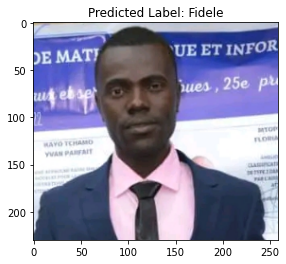

1/1 [==============================] - 1s 502ms/step
Image: face5.jpg - Predicted Label: Joyce


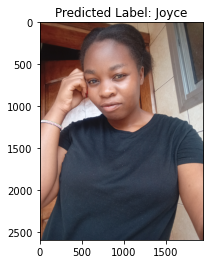

1/1 [==============================] - 1s 967ms/step
Image: face7.jpg - Predicted Label: Batbaina


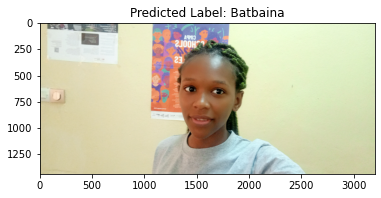

1/1 [==============================] - 0s 385ms/step
Image: face6.jpg - Predicted Label: Michel


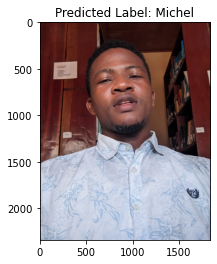

1/1 [==============================] - 0s 318ms/step
Image: face1.jpg - Predicted Label: Batbaina


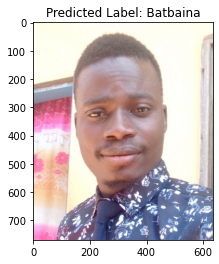

1/1 [==============================] - 0s 305ms/step
Image: face2.jpg - Predicted Label: Dorcas


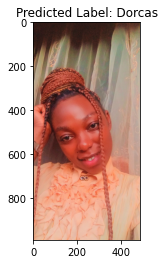

In [2]:
import os
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt  # Import for image display

# Load the trained model
model_path = "transfer_learning_trained_face_cnn_model.h5"
model = load_model(model_path)

# Load the face labels
with open("face-labels.pickle", "rb") as f:
    face_labels = pickle.load(f)

# Function to preprocess an image for the model
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Test the model on images in the Headshots folder
headshots_folder = "/home/student23/Documents/Own folder of Master AIMS coop/REVIEW PHASE/BLOCK 5/Machine learning and algorithms/WEEK 3/PRESENTATION GROUP 3/FaceRecognition/facestest"
for filename in os.listdir(headshots_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(headshots_folder, filename)
        preprocessed_image = preprocess_image(image_path)

        # Make prediction using the model
        predictions = model.predict(preprocessed_image)
        predicted_index = tf.argmax(predictions[0]).numpy()  # Convert tensor to integer
        predicted_label = face_labels[predicted_index]

        # Print and display the predicted label
        print(f"Image: {filename} - Predicted Label: {predicted_label}")

        # Display the image with predicted label
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.title(f"Predicted Label: {predicted_label}")
        plt.show()


<h2>Face Recognition Using Webcam </h2>

With the model trained to recognize faces belonging to each student it would be fun to be able to recognize their faces using the webcam. We can see how to use the webcam to perform the prediction in real-time

In [ ]:
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model

# Load model and labels
model = load_model('transfer_learning_trained_face_cnn_model.h5')
with open("face-labels.pickle", 'rb') as f:
    labels = pickle.load(f)

# Load Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Webcam resolution
screen_width = 1280
screen_height = 720

# Image size for prediction
image_width = 224
image_height = 224

# Open webcam
stream = cv2.VideoCapture(0)

# Check if webcam opened successfully
if not stream.isOpened():
    print("Error opening webcam!")
    exit()

while True:
    # Read frame from webcam
    ret, frame = stream.read()

    # Check if frame is empty (handle reading errors)
    if not ret:
        print("Error reading frame from webcam!")
        break

    # Convert frame to RGB for OpenCV compatibility
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect faces
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract region of interest (ROI)
        roi = frame[y:y+h, x:x+w]

        # Resize ROI to model input size
        resized_roi = cv2.resize(roi, (image_width, image_height))

        # Preprocess image for model prediction
        img_array = np.array(resized_roi, "uint8")
        model_input = img_array.reshape(1, image_width, image_height, 3)
        model_input = model_input.astype('float32') / 255.0

        # Predict face label
        predicted_prob = model.predict(model_input)
        predicted_label = labels[predicted_prob[0].argmax()]

        # Draw rectangle around face and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, f"({predicted_label})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Image', frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
stream.release()
cv2.destroyAllWindows()


![Logo Markdown](FIles/im12.png)

                        https://www.codemag.com/Article/2205081/Implementing-Face-Recognition-Using-Deep-Learning-and-Support-Vector-Machines

                        https://www.google.com/search?q=optimizer+:+Adam&source=lmns&hl=en&sa=X&ved=2ahUKEwiElrLOn_eEAxUduCcCHWdjAu0Q0pQJKAB6BAgBEAI

                        https://cerenaut.ai/2019/02/28/optimization-using-adam-on-sparse-tensors/

                        https://www.softwebsolutions.com/resources/AI-based-face-recognition.html